In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("calories_data.csv")

In [3]:
data.head()

,Gender,Height,Weight,Age,ActivityLevel,Calories
0,Male,161,89,70,lightly active,2132.96875
1,Male,179,127,30,extra active,4263.12500
2,Male,172,139,53,sedentary,2646.00000
3,Male,153,104,35,sedentary,2191.50000
4,Male,165,68,67,lightly active,1899.21875


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         400 non-null    object 
 1   Height         400 non-null    int64  
 2   Weight         400 non-null    int64  
 3   Age            400 non-null    int64  
 4   ActivityLevel  400 non-null    object 
 5   Calories       400 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ KB


In [5]:
data.shape

(400, 6)

In [6]:
data.describe()

,Height,Weight,Age,Calories
count,400.000000,400.000000,400.000000,400.000000
mean,170.362500,106.060000,45.237500,2827.788219
std,16.574011,32.362242,20.390575,750.219107
min,140.000000,50.000000,10.000000,1311.300000
25%,156.000000,80.000000,27.000000,2263.095313
50%,171.000000,106.500000,45.000000,2725.975000
75%,184.000000,136.250000,63.000000,3332.296875
max,199.000000,160.000000,80.000000,4769.000000


In [7]:
data.isna().sum()

Gender           0
Height           0
Weight           0
Age              0
ActivityLevel    0
Calories         0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
gen_encoder = LabelEncoder()
data["Gender"] = gen_encoder.fit_transform(data['Gender'])

ActivityLevel_encoder = LabelEncoder()
data["ActivityLevel"] = ActivityLevel_encoder.fit_transform(data['ActivityLevel'])

data.sample(10)

,Gender,Height,Weight,Age,ActivityLevel,Calories
153,0,166,144,67,very active,3418.08750
372,1,154,100,67,sedentary,1959.00000
6,1,182,108,60,sedentary,2307.00000
258,0,196,159,37,very active,4259.02500
288,0,182,84,27,lightly active,2312.06250
354,0,188,128,57,sedentary,2410.80000
136,0,189,125,34,very active,3622.93125
285,1,175,135,20,sedentary,2818.50000
108,0,151,55,72,moderately active,1507.76250
2,1,172,139,53,sedentary,2646.00000


In [10]:
X = data.drop(columns='Calories')
y = data['Calories']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
corr = data.corr()
sns.heatmap(corr, annot = True)

ValueError: could not convert string to float: 'lightly active'

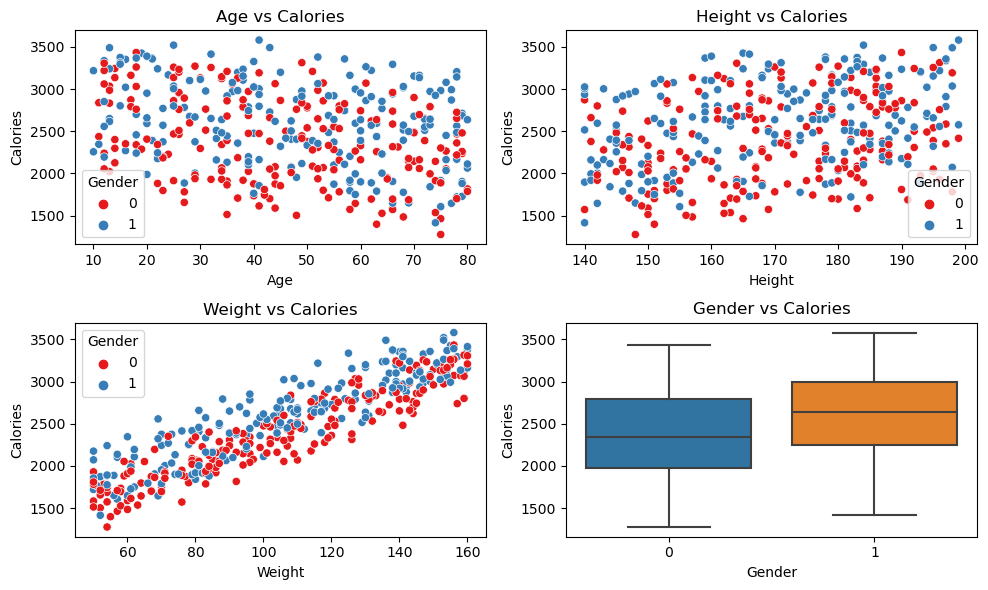

In [24]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot for Age vs Calories
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='Age', y='Calories', hue='Gender', palette='Set1')
plt.title('Age vs Calories')

# Plot for Height vs Calories
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='Height', y='Calories', hue='Gender', palette='Set1')
plt.title('Height vs Calories')

# Plot for Weight vs Calories
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='Weight', y='Calories', hue='Gender', palette='Set1')
plt.title('Weight vs Calories')

# Plot for Gender vs Calories (Boxplot)
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='Gender', y='Calories')
plt.title('Gender vs Calories')

plt.tight_layout()
plt.show()

In [25]:
X_train

,Gender,Height,Weight,Age
3,1,153,104,40
18,0,146,104,18
202,0,180,156,29
250,1,183,147,40
274,0,156,52,48
...,...,...,...,...
71,1,168,160,71
106,0,171,120,78
270,1,187,62,39
348,0,155,115,63


In [26]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
}

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    # Store results
    evaluation_results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
        'Explained Variance Score': evs
    }

# Display results and find the best model based on R-squared
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['R-squared'])
best_model_metrics = evaluation_results[best_model_name]

# Print the evaluation results for each model
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

# # Print the best model
# print(f"Best Model: {best_model_name}")
# print("Best Model Metrics:")
# for metric, value in best_model_metrics.items():
#     print(f"{metric}: {value:.4f}")


Model: Linear Regression
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R-squared: 1.0000
Explained Variance Score: 1.0000


Model: Random Forest Regressor
MAE: 61.6869
MSE: 6400.1553
RMSE: 80.0010
R-squared: 0.9780
Explained Variance Score: 0.9780


Model: Support Vector Regressor
MAE: 444.8676
MSE: 269085.6911
RMSE: 518.7347
R-squared: 0.0746
Explained Variance Score: 0.0802




In [28]:
RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
def get_user_input():
    gender = input("Enter Gender (Male/Female): ")
    height = float(input("Enter Height (in cm): "))
    weight = float(input("Enter Weight (in kg): "))
    age = int(input("Enter Age: "))  # Now age is taken as input directly
    return gender, height, weight, age


In [30]:
# Get user input
gender, height, weight, age = get_user_input()

# Prepare the input data
user_input = pd.DataFrame({
    'Gender': [1 if gender == 'Male' else 0],
    'Height': [height],
    'Weight': [weight],
    'Age': [age]  # Using 'Age' for prediction
})

# Make the prediction for Calories
predicted_calories = RFR.predict(user_input)

# Show the result
print(f"Predicted Calories: {predicted_calories[0]:.2f}")


Predicted Calories: 2819.27


In [31]:
import joblib
# Save the model
joblib.dump(RFR, 'random_forest_model_for_calories.pkl')

print("Model saved successfully!")

Model saved successfully!


In [32]:
import joblib
test_model = joblib.load('random_forest_model_for_calories.pkl')


In [33]:
# Get user input
gender, height, weight, age = get_user_input()

# Prepare the input data
user_input = pd.DataFrame({
    'Gender': [1 if gender == 'Male' else 0],
    'Height': [height],
    'Weight': [weight],
    'Age': [age]  # Using 'Age' for prediction
})

# Make the prediction for Calories
predicted_calories = test_model.predict(user_input)

# Show the result
print(f"Predicted Calories: {predicted_calories[0]:.2f}")


Predicted Calories: 2819.27


In [34]:
import sklearn
print(sklearn.__version__)


1.2.2


In [35]:
import pip
print(pip.__version__)



24.1.1


c:\Users\Abdelrahman\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
